# This project uses the Dhaka Stock Prices excel file to do preprocessing, data visualization and predicting particular stock prices 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Preprocessing

# Importing excel file







In [ ]:
stock = pd.read_excel('/content/drive/My Drive/Colab Notebooks/CSE422 Project files/prices_2019.xlsx')
stock.head()

,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume
0,2019-12-30,1JANATAMF,4.3,4.3,4.2,0.0,4.3,4.2,29,0.898,208957
1,2019-12-29,1JANATAMF,4.2,4.3,4.2,4.2,4.2,4.3,33,1.215,289149
2,2019-12-26,1JANATAMF,4.3,4.3,4.2,4.2,4.3,4.2,13,0.172,40362
3,2019-12-24,1JANATAMF,4.2,4.3,4.2,4.2,4.2,4.2,34,0.839,199583
4,2019-12-23,1JANATAMF,4.3,4.3,4.2,4.2,4.2,4.2,34,0.969,230775


In [ ]:
stock.shape

(138291, 11)

# Counting the 0 values in the opening_price column

In [ ]:
stock[stock['opening_price'] == 0].count()

date                        55495
trading_code                55495
last_traded_price           55495
high                        55495
low                         55495
opening_price               55495
closing_price               55495
yesterdays_closing_price    55495
trade                       55495
value_mn                    55495
volume                      55495
dtype: int64

# Removing the values that are 0

In [ ]:
stock=stock[stock['opening_price'] > 0]

# Checking if they have been dropped properly

In [ ]:
stock[stock['opening_price'] == 0].count()

date                        0
trading_code                0
last_traded_price           0
high                        0
low                         0
opening_price               0
closing_price               0
yesterdays_closing_price    0
trade                       0
value_mn                    0
volume                      0
dtype: int64

# Checking the number of rows and columns

In [ ]:
stock.shape

(82796, 11)

In [ ]:
stock.head()

,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume
1,2019-12-29,1JANATAMF,4.2,4.3,4.2,4.2,4.2,4.3,33,1.215,289149
2,2019-12-26,1JANATAMF,4.3,4.3,4.2,4.2,4.3,4.2,13,0.172,40362
3,2019-12-24,1JANATAMF,4.2,4.3,4.2,4.2,4.2,4.2,34,0.839,199583
4,2019-12-23,1JANATAMF,4.3,4.3,4.2,4.2,4.2,4.2,34,0.969,230775
5,2019-12-22,1JANATAMF,4.2,4.3,4.2,4.2,4.2,4.2,36,0.994,236668


# Calculating correlation between the columns

In [ ]:
stock_corr=stock.corr()
stock_corr

,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume
last_traded_price,1.000000,0.999768,0.999705,0.999517,0.999972,0.999004,0.181488,0.117557,-0.125869
high,0.999768,1.000000,0.999558,0.999698,0.999791,0.999052,0.184950,0.119737,-0.125769
low,0.999705,0.999558,1.000000,0.999795,0.999735,0.999033,0.178997,0.115646,-0.126174
opening_price,0.999517,0.999698,0.999795,1.000000,0.999549,0.999084,0.182249,0.117593,-0.126153
closing_price,0.999972,0.999791,0.999735,0.999549,1.000000,0.999037,0.181567,0.117656,-0.125836
yesterdays_closing_price,0.999004,0.999052,0.999033,0.999084,0.999037,1.000000,0.180511,0.115934,-0.126301
trade,0.181488,0.184950,0.178997,0.182249,0.181567,0.180511,1.000000,0.801301,0.480511
value_mn,0.117557,0.119737,0.115646,0.117593,0.117656,0.115934,0.801301,1.000000,0.573484
volume,-0.125869,-0.125769,-0.126174,-0.126153,-0.125836,-0.126301,0.480511,0.573484,1.000000


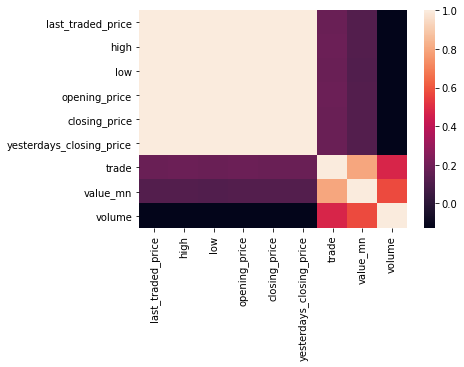

In [ ]:
import seaborn as sns

sns.heatmap(stock_corr)

In [ ]:
# Drop that column from the DataFrame
stock = stock.drop('high', axis=1)
stock = stock.drop('low', axis=1)
stock = stock.drop('opening_price', axis=1)
stock = stock.drop('last_traded_price', axis=1)
stock = stock.drop('trade', axis=1)
stock = stock.drop('value_mn', axis=1)
stock.head()


,date,trading_code,closing_price,yesterdays_closing_price,volume
1,2019-12-29,1JANATAMF,4.2,4.3,289149
2,2019-12-26,1JANATAMF,4.3,4.2,40362
3,2019-12-24,1JANATAMF,4.2,4.2,199583
4,2019-12-23,1JANATAMF,4.2,4.2,230775
5,2019-12-22,1JANATAMF,4.2,4.2,236668


In [ ]:
stock.shape

(82796, 5)

# Creating individual dataframes for the stocks we are working on

In [ ]:
brac=stock.loc[stock["trading_code"] == 'BRACBANK']
brac["date"] = pd.to_datetime(brac["date"])
brac = brac.sort_values(by="date")
brac = brac.set_index('date')
#brac.sort_values(by=['volume'], ascending=False)
brac.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,trading_code,closing_price,yesterdays_closing_price,volume
date,,,,
2019-01-01,BRACBANK,74.9,72.7,619356
2019-01-02,BRACBANK,74.5,74.9,885714
2019-01-03,BRACBANK,75.0,74.5,1733547
2019-01-06,BRACBANK,76.6,75.0,2885543
2019-01-07,BRACBANK,75.8,76.6,3359620


In [ ]:
beximco=stock.loc[stock["trading_code"] == 'BEXIMCO']
beximco["date"] = pd.to_datetime(beximco["date"])
beximco = beximco.sort_values(by="date")
beximco = beximco.set_index('date')
beximco.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,trading_code,closing_price,yesterdays_closing_price,volume
date,,,,
2019-01-01,BEXIMCO,25.5,23.5,11542506
2019-01-02,BEXIMCO,25.2,25.5,6762630
2019-01-03,BEXIMCO,26.4,25.2,12076107
2019-01-06,BEXIMCO,26.1,26.4,9760186
2019-01-07,BEXIMCO,25.3,26.1,7868697


# Data Visualization

# Plotting the graph showing the price throughout the year

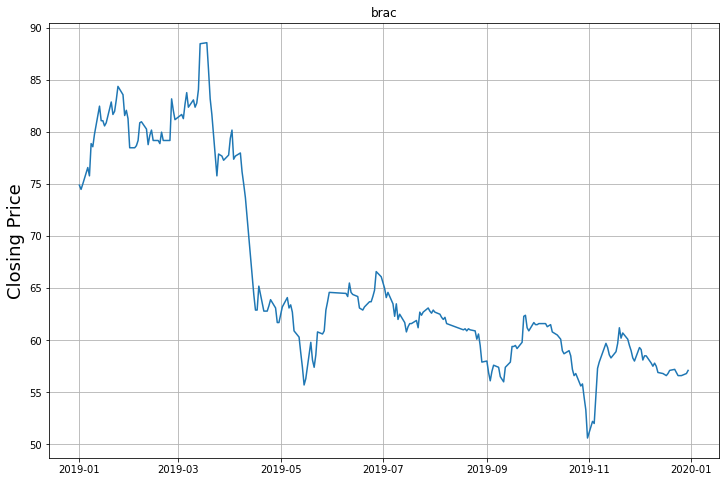

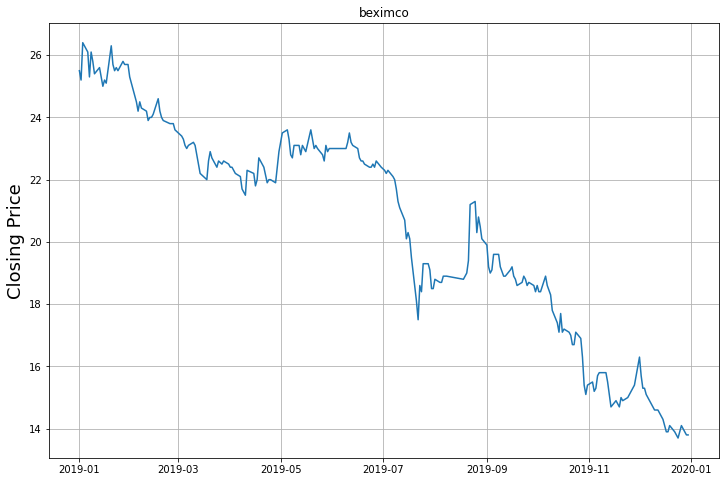

In [ ]:

plt.figure(figsize=(12,8))
#x=brac['date']
y=brac['closing_price']
plt.plot( y)
plt.title('brac')
plt.grid(True)
plt.ylabel('Closing Price', fontsize=18)
plt.figure(figsize=(12,8))
#x=beximco['date']
y=beximco['closing_price']
plt.plot( y)
plt.title('beximco')
plt.ylabel('Closing Price', fontsize=18)
plt.grid(True)




# Plotting the graph showing the volume exchanged throughout the year

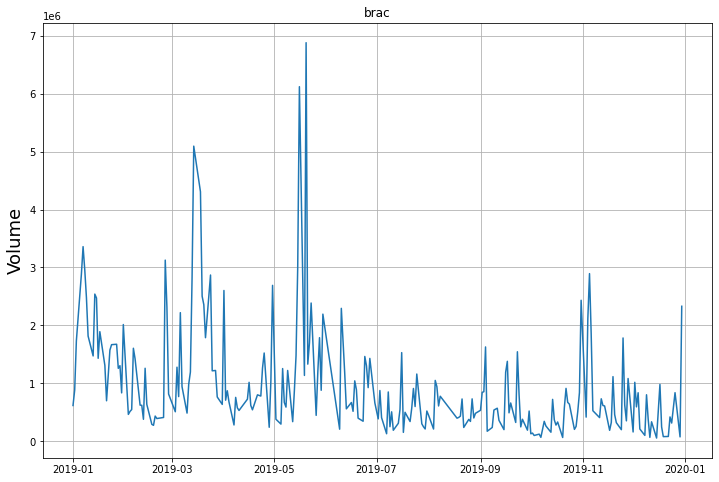

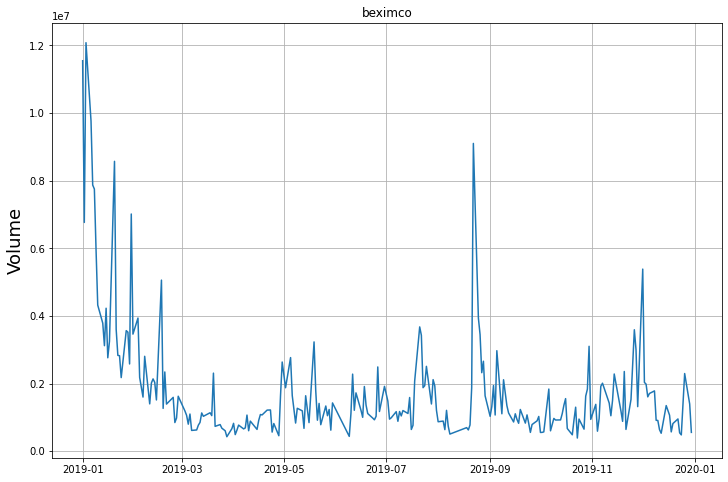

In [ ]:
plt.figure(figsize=(12, 8))
#x=brac['date']
y=brac['volume']
plt.plot(y)
plt.title('brac')
plt.ylabel('Volume', fontsize=18)
plt.grid(True)

plt.figure(figsize=(12,8))
#x=beximco['date']
y=beximco['volume']
plt.plot(y)
plt.title('beximco')
plt.ylabel('Volume', fontsize=18)
plt.grid(True)


# Prediction

# Predicting BRAC Stock Using LSTM

In [ ]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(0,1))
# scaled_data = scaler.fit_transform(dataset)

# scaled_data
# scaled_data.shape

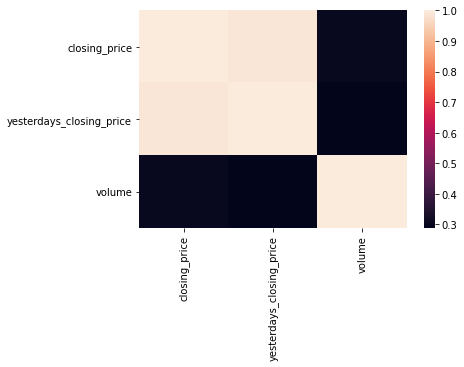

In [ ]:
import seaborn as sns
brac_corr=brac.corr()
sns.heatmap(brac_corr)

# Feature Engineering

In [ ]:
from sklearn.model_selection import train_test_split
X = brac.drop('closing_price',axis=True)
X = X.drop('trading_code',axis=True)
y = brac[['closing_price']]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.3)
result = y_test
scaler = MinMaxScaler()
scaler.fit(y_train)
y_train =scaler.transform(y_train) 
scaler.fit(y_test)
y_test =scaler.transform(y_test) 
##have to convert to 3 dim for feeding RNN
x_train = np.array(x_train)
x_test = np.array(x_test)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)
#print(y_train)

(165, 2, 1)
(71, 2, 1)
(165, 1)
(71, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1)) 
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(x_train,y_train,batch_size=1, epochs=50)
model.summary()

Epoch 1/50
165/165 [==============================] - 0s 3ms/step - loss: 0.0684
Epoch 2/50
165/165 [==============================] - 0s 2ms/step - loss: 0.0452
Epoch 3/50
165/165 [==============================] - 0s 3ms/step - loss: 0.0247
Epoch 4/50
165/165 [==============================] - 0s 3ms/step - loss: 0.0140
Epoch 5/50
165/165 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 6/50
165/165 [==============================] - 0s 3ms/step - loss: 0.0148
Epoch 7/50
165/165 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 8/50
165/165 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 9/50
165/165 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 10/50
165/165 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 11/50
165/165 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 12/50
165/165 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 13/50
165/165 [====

In [ ]:
y_pred = model.predict(x_test)
output = scaler.inverse_transform(y_pred)
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((output - y_test) ** 2)))
print(rmse)
real_output = []
for item in output:
    real_output.append((item[0]))
result['predited value'] = np.array(real_output)
result=result.reset_index(level='date')

result["date"] = pd.to_datetime(result["date"])
result = result.sort_values(by="date")
result = result.set_index('date')
print(result.head())

66.02448170773847
            closing_price  predited value
date                                     
2019-01-03           75.0       72.454895
2019-01-07           75.8       74.310135
2019-01-08           78.9       73.615547
2019-01-09           78.6       76.216125
2019-01-13           82.5       76.923187


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


# The RMSE is 64.64

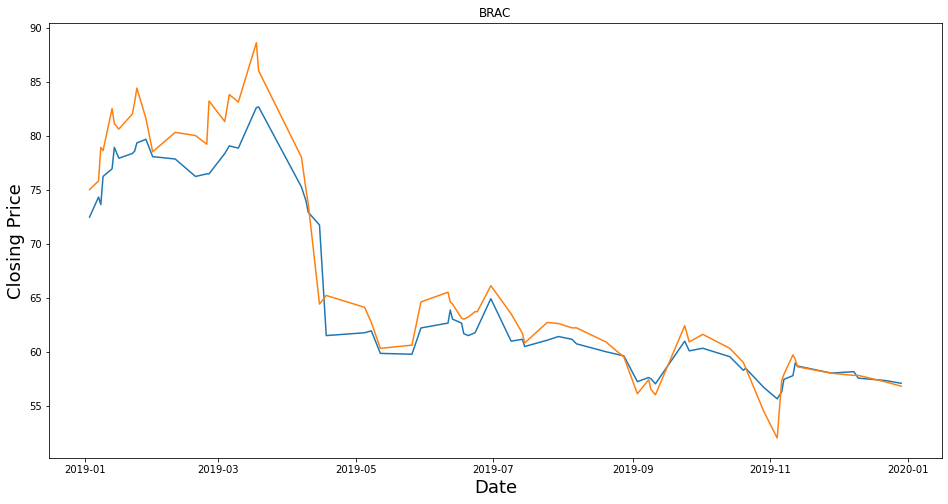

In [ ]:
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('BRAC')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
#y=brac['closing_price']
#y=p['yesterdays_closing_price']
#plt.plot(y)
plt.plot(result[['predited value']])
plt.plot(result[['closing_price']])
#plt.legend(['Actual Value', 'Predictions'], loc='lower right')
plt.show()
#plt.legend(['test','prediction'])

In [ ]:
beximco=beximco.drop('trading_code',axis=True)
beximco=beximco.drop('yesterdays_closing_price',axis=True)
beximco=beximco.drop('volume',axis=True)
print(beximco)

            closing_price
date                     
2019-01-01           25.5
2019-01-02           25.2
2019-01-03           26.4
2019-01-06           26.1
2019-01-07           25.3
...                   ...
2019-12-23           13.8
2019-12-24           13.7
2019-12-26           14.1
2019-12-29           13.8
2019-12-30           13.8

[236 rows x 1 columns]


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:        D.closing_price   No. Observations:                  235
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -91.342
Method:                       css-mle   S.D. of innovations              0.357
Date:                Mon, 28 Sep 2020   AIC                            196.685
Time:                        15:50:10   BIC                            220.902
Sample:                             1   HQIC                           206.448
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0503      0.019     -2.695      0.008      -0.087      -0.014
ar.L1.D.closing_price     0.0345      0.065      0.528      0.598      -0.093       0.162
ar.L2.D.

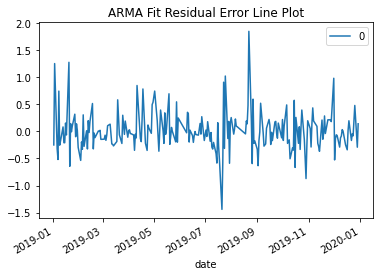

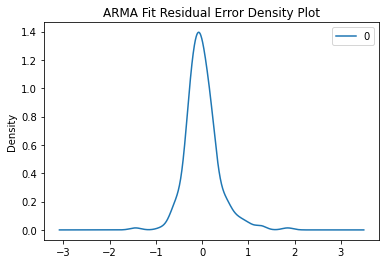

                0
count  235.000000
mean     0.000682
std      0.358073
min     -1.441195
25%     -0.205668
50%     -0.042348
75%      0.168730
max      1.851664


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(beximco, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('ARMA Fit Residual Error Line Plot')
plt.show()

residuals.plot(kind='kde')
plt.title('ARMA Fit Residual Error Density Plot')
plt.show()
print(residuals.describe())

# BEXIMCO prediction using arima model

In [ ]:
from sklearn.metrics import mean_squared_error

X = beximco.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))




predicted=20.310330, expected=19.900000
predicted=19.854757, expected=19.200000
predicted=19.188086, expected=19.000000
predicted=19.116822, expected=19.100000
predicted=19.053505, expected=19.600000
predicted=19.645090, expected=19.600000
predicted=19.491156, expected=19.200000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=19.156237, expected=18.900000
predicted=18.842118, expected=18.900000
predicted=18.889512, expected=19.100000
predicted=19.100329, expected=19.200000
predicted=19.153740, expected=18.900000
predicted=18.824154, expected=18.800000
predicted=18.784276, expected=18.600000
predicted=18.530776, expected=18.700000
predicted=18.737239, expected=18.900000
predicted=18.833238, expected=18.800000
predicted=18.740169, expected=18.600000
predicted=18.554600, expected=18.700000
predicted=18.661259, expected=18.600000
predicted=18.532849, expected=18.400000
predicted=18.397866, expected=18.600000
predicted=18.573195, expected=18.400000
predicted=18.305028, expected=18.400000
predicted=18.433981, expected=18.900000
predicted=18.819742, expected=18.600000
predicted=18.472408, expected=18.300000
predicted=18.335896, expected=17.800000
predicted=17.691333, expected=17.400000
predicted=17.477832, expected=17.100000
predicted=17.119714, expected=17.700000
predicted=17.792874, expected=17.100000


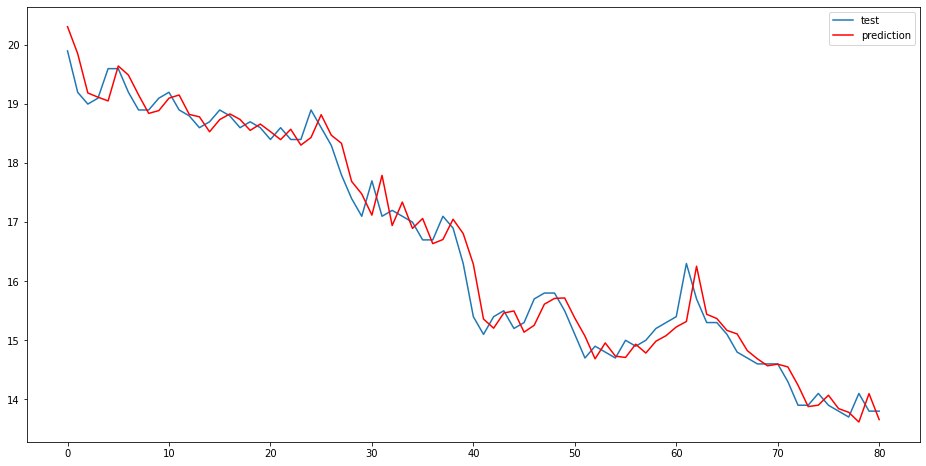

In [ ]:
# plot
plt.figure(figsize=(16,8))
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(['test','prediction'])
plt.show()

In [ ]:
import math
error = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % math.sqrt(error))

Test RMSE: 0.307


# In Conclusion we can say that the arima model gives a less rms error than the lstm model.